In [2]:
import pathlib
import os
import tifffile 
import pathlib
from pyometiff import OMETIFFReader
import random

# Set the desired output directory
output_dir = "/home/amarinai/Data/Random_crops_long/Tiff_files/Train" 
os.makedirs(output_dir, exist_ok=True)
output_shape = [50, 100, 100]

# Path to the TIFF OME file
tiff_ome_path = '/home/amarinai/Data/l45_unlabeled/I45_slice10_fused.ome.tif'
path = pathlib.Path(tiff_ome_path)  # '/home/amarinai/Data/I45_slice10_fused.ome.tif'

# Initialize the OME-TIFF reader and read the image
reader = OMETIFFReader(fpath=path)
print("preparing to read... this will take a few minutes")
img_to_crop, metadata, _ = reader.read()
print(img_to_crop.shape)
print(metadata)
print("entering the loop")

preparing to read... this will take a few minutes
Key not found: list index out of range
Key not found: list index out of range
key not found list index out of range
Key not found: list index out of range
(207, 10645, 12728)
{'Directory': '/home/amarinai/Data/l45_unlabeled', 'Filename': 'I45_slice10_fused.ome.tif', 'Extension': 'ome.tiff', 'ImageType': 'ometiff', 'TotalSeries': 1, 'SizeX': 12728, 'SizeY': 10645, 'SizeZ': 207, 'SizeC': 1, 'SizeT': 1, 'SizeS': 1, 'SizeB': 1, 'SizeM': 1, 'PhysicalSizeX': 3.6, 'PhysicalSizeXUnit': 'µm', 'PhysicalSizeY': 3.6, 'PhysicalSizeYUnit': 'µm', 'PhysicalSizeZ': 3.6, 'PhysicalSizeZUnit': 'µm', 'Sizes BF': [1, 1, 207, 1, 10645, 12728], 'DimOrder BF': 'XYZCT', 'DimOrder BF Array': 'TCZYX', 'Channels': {'NeuN': {'Name': 'NeuN', 'ID': 'Channel:00', 'SamplesPerPixel': 1, 'ExcitationWavelength': 638.0, 'ExcitationWavelengthUnit': 'nm', 'EmissionWavelength': 697.0, 'EmissionWavelengthUnit': 'nm', 'Fluor': 'Alexa Fluor 647'}}, 'ImageIDs': [0], 'AcquisitionDa

In [ ]:
i=0


0
0
0
0
2673
918.0
732.0
the loop is over..
[]


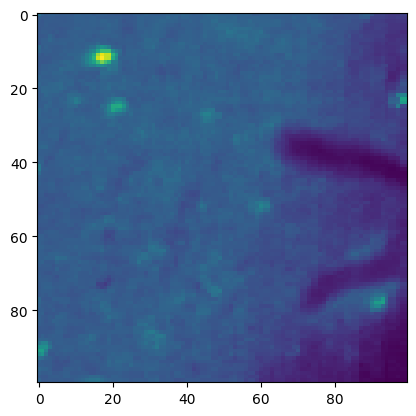

In [119]:
import numpy as np
import matplotlib.pyplot as plt

crops = []
output_dir = "/home/amarinai/Data/Random_crops_long/Tiff_files/Train" 
while i<=86:
    # Extract the crop from the image

    start_depth = random.randint(0, img_to_crop.shape[0] - output_shape[0])
    start_height = random.randint(0, img_to_crop.shape[1] - output_shape[1])
    start_width = random.randint(0, img_to_crop.shape[2] - output_shape[2])
    
    # Extract the random crop from the image
    crop = img_to_crop[start_depth:start_depth + output_shape[0],
                       start_height:start_height + output_shape[1],
                       start_width:start_width + output_shape[2]]    
    
    print(i)    
    
    if np.percentile(crop, 99) >= 500:
        print(np.max(crop))
        print(np.percentile(crop, 99))
        print(np.percentile(crop, 95))

        crop_filename = os.path.join(output_dir, f"crop_{i}.tif")
        #tifffile.imwrite(crop_filename, crop)  # or use Image.fromarray(crop).save(crop_filename) if using PIL
        plt.imshow(crop.max(0))
        break
        # Append the crop to the list (if needed)
        crops.append(crop)
        i+=1

print("the loop is over..")
print(crops)